# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Execute Functions

In [7]:
def yperceptron(W: np.ndarray, b: np.ndarray, X: np.ndarray):
    '''
        W (np.ndarray): represent the weights of the neuron
        b (np.ndarray): represent the bias of the neuron
        X (np.ndarray): represent the inputs of the neuron
    '''
    result = np.dot(W, X) + b
    return [1 if v >= 0 else 0 for v in result[0]]

def treina_perceptron(W: np.ndarray, b: np.ndarray, 
                      X: np.ndarray, yd: np.ndarray,  
                      alfa: float, maxepocas: int, 
                      tol: float):
    '''
        W (np.ndarray): represent the weights of the neuron
        b (np.ndarray): represent the bias of the neuron
        X (np.ndarray): represent the inputs of the neuron
        yd (np.ndarray): represent the expected results (labels)
        alfa (float): represent the learning ratio 
        maxepocas (int): represent the max epochs for traning the model
        tol (float): represent the error tolerance
    '''
    
    N = X.shape[1]
    SEQ = tol
    VetorSEQ = list()

    for epoch in range(1, maxepocas+1, 1):
        if SEQ < tol:
            return W, b, VetorSEQ
        
        SEQ = 0
        
        for i in range(N):
            y = yperceptron(W, b, X.T[i])
            erro = yd[0][i] - y
            W += alfa*erro*X.T[i]
            b += alfa*erro
            SEQ += erro**2
            
        VetorSEQ.append(float(SEQ[0]))
    
    return W, b, VetorSEQ

def plotadc2d(X: np.ndarray, yd: np.ndarray):
    '''
        X (np.ndarray): represent the inputs of the neuron
        yd (np.ndarray): represent the expected results (labels)
    '''
    data = {
        0: {'color': 'bo', 'label': 'o: y = 0'},
        1: {'color': 'r+', 'label': '+: y = 1'},
        2: {'color': 'go', 'label': 'o: y = 2'},
        3: {'color': 'ro', 'label': 'o: y = 3'},
        4: {'color': 'co', 'label': 'o: y = 4'},
        5: {'color': 'mo', 'label': 'o: y = 5'},
        6: {'color': 'yo', 'label': 'o: y = 6'},
        7: {'color': 'ko', 'label': 'o: y = 7'},
        8: {'color': 'y+', 'label': '+: y = 8'},
        9: {'color': 'k+', 'label': '+: y = 9'},
    }

    plt.figure(figsize=(12, 6))
    for i, (x1, x2) in enumerate(X.T):
        plt.plot(x1, x2, data[yd[0][i]]['color'], label=data[yd[0][i]]['label'], markersize=10)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title('Representação Gráfica da Classificação')
    plt.xlabel('X1')
    plt.ylabel('X2')

def plotareta(W: np.ndarray, b: np.ndarray, intervalo: list):
    '''
        W (np.ndarray): represent the weights of the neuron
        b (np.ndarray): represent the bias of the neuron
        intervalo (list): represent the min and max values of X1
    '''
    X1 = np.linspace(intervalo[0], intervalo[1], 100)

    X2 = -(W[0][0] * X1 + b[0][0]) / W[0][1]
    plt.plot(X1, X2)    
    plt.grid()
    plt.show()


def geragauss(nc, npc, mc, varc):
    '''
        nc (int): Quantity class types
        npc (np.array): number of samples for each class
        mc (np.array): matrix with mean values of each class dimension
        varc (np.ndarray): matrix with variance values for each class dimension
    '''
    X = None
    yd = None

    for i in range(nc):

        samples = np.random.multivariate_normal(mc[i], np.diag(varc[i]), npc[0][i])
        samples = samples.reshape(2, npc[0][i])
        labels = np.array([i for _ in range(npc[0][i])]).reshape((1, npc[0][i]))

        if X is None:
            X = samples
            yd = labels
            
        else:
            X = np.hstack([X, samples])
            yd = np.hstack([yd, labels])

    return X, yd

def mistura(X, yd):

    indices = np.random.permutation(X.shape[1])
    xp = X[:, indices]
    yp = yd[:, indices]

    return xp, yp

# Execute With Linear Separation

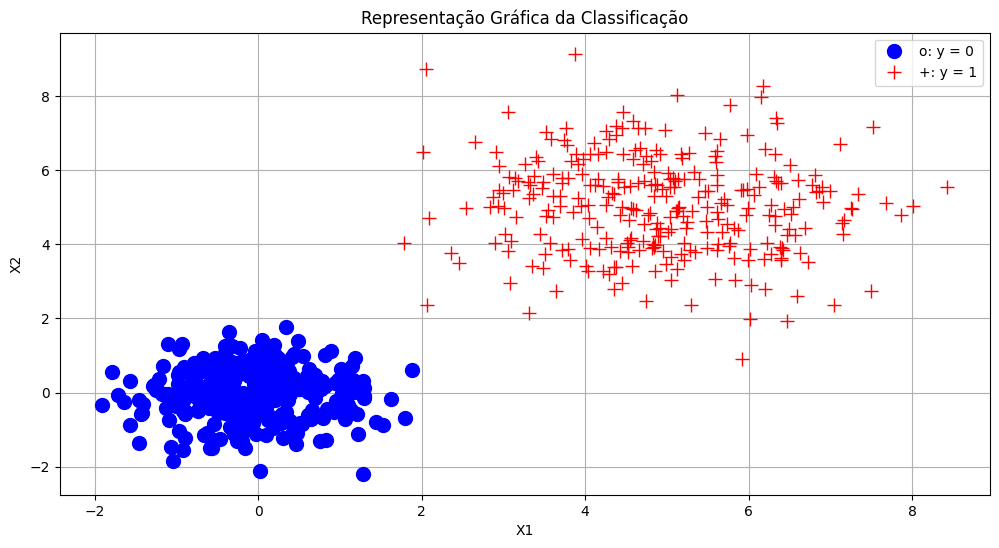

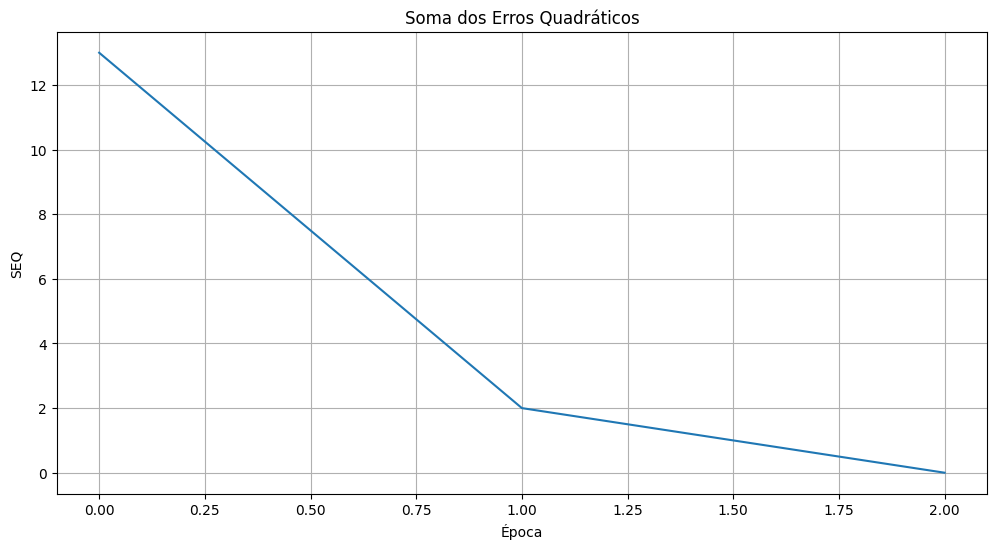

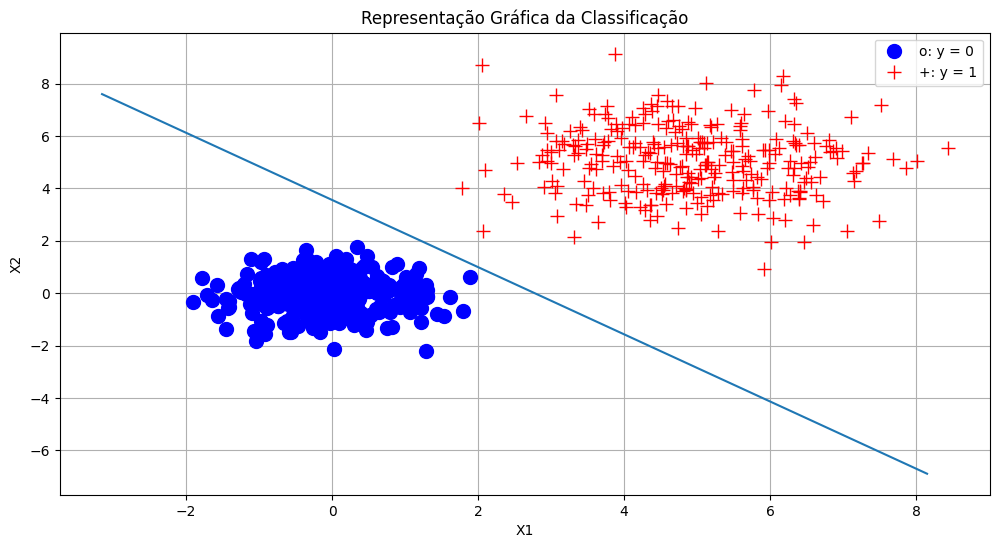

In [11]:
nc = 2 
npc = np.array([[300, 300]])
mc = np.array([[0, 0],[5, 5]]) 
varc = np.array([[0.5, 0.5], [1.5, 1.5]])
npc.shape, mc.shape, varc.shape

X, yd = geragauss(nc, npc, mc, varc)

xp, yp = mistura(X, yd)
plotadc2d(xp, yp)
plt.grid()
plt.show()

W = np.array(np.random.rand(1, 2))*2 - 1
b = np.array(np.random.rand(1, 1))*2 - 1
alfa = 1.2
tol = 0.001
maxepocas = 10

W, b, VetorSEQ = treina_perceptron(W, b, xp, yp, alfa, maxepocas, tol)

plt.figure(figsize=(12, 6))
plt.plot(VetorSEQ)
plt.xlabel("Época")
plt.ylabel("SEQ")
plt.title("Soma dos Erros Quadráticos")
plt.grid()
plt.show()

y = yperceptron(W, b, xp)

intervalo = [-3.15, 8.15]
plotadc2d(X=xp, yd=yp)
plotareta(W=W, b=b, intervalo=intervalo)

# Execute Without Linear Separation

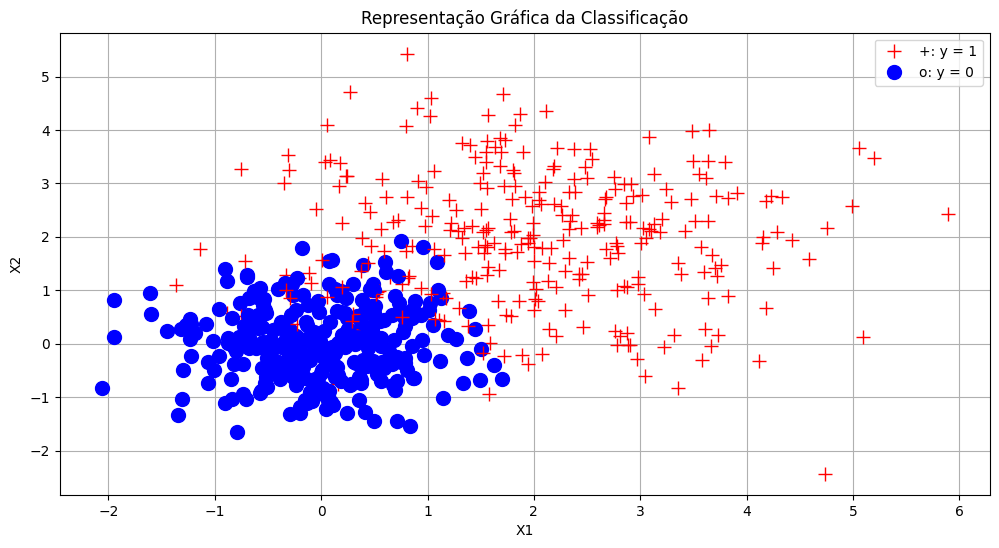

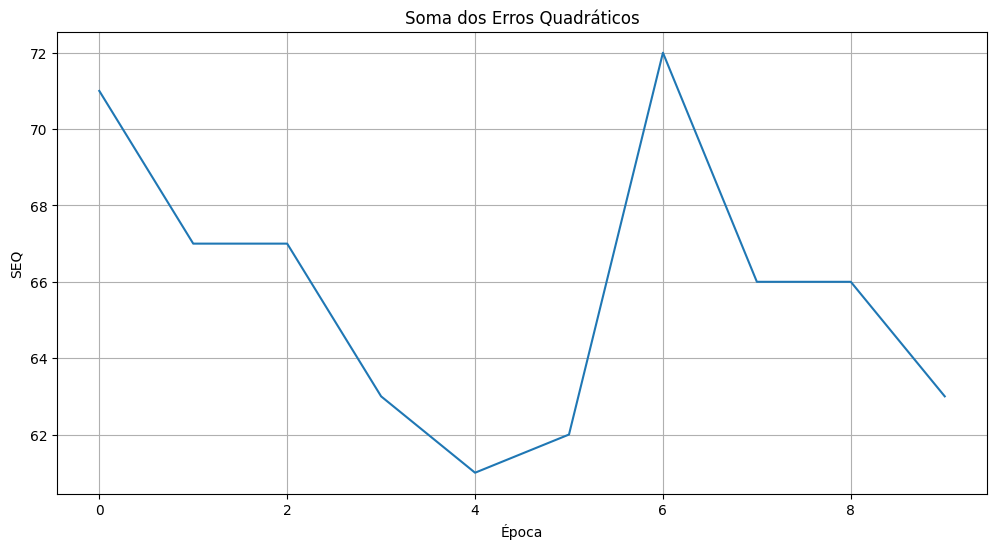

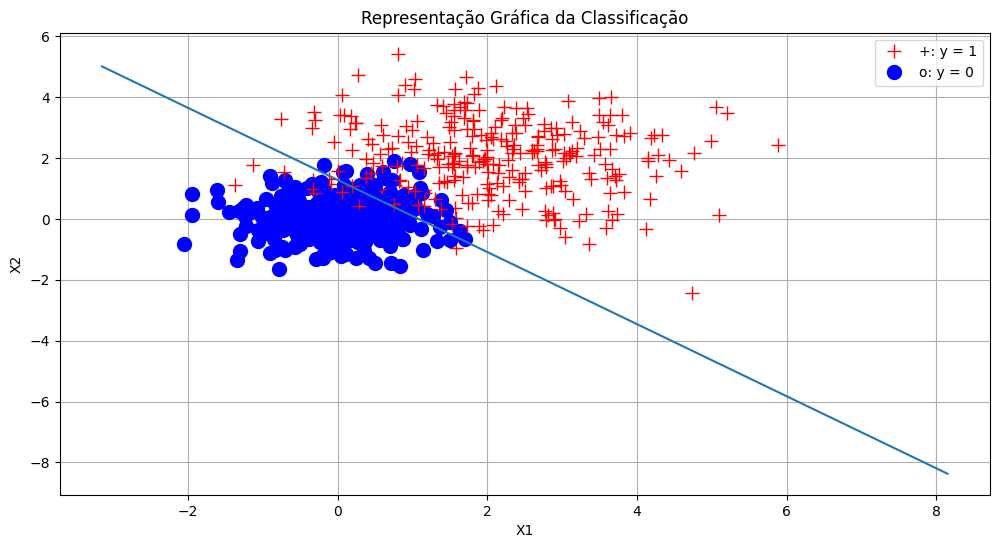

In [13]:
nc = 2 
npc = np.array([[300, 300]])
mc = np.array([[0, 0],[2, 2]]) 
varc = np.array([[0.5, 0.5], [1.5, 1.5]])
npc.shape, mc.shape, varc.shape

X, yd = geragauss(nc, npc, mc, varc)

xp, yp = mistura(X, yd)
plotadc2d(xp, yp)
plt.grid()
plt.show()

W = np.array(np.random.rand(1, 2))*2 - 1
b = np.array(np.random.rand(1, 1))*2 - 1
alfa = 1.2
tol = 0.001
maxepocas = 10

W, b, VetorSEQ = treina_perceptron(W, b, xp, yp, alfa, maxepocas, tol)

plt.figure(figsize=(12, 6))
plt.plot(VetorSEQ)
plt.xlabel("Época")
plt.ylabel("SEQ")
plt.title("Soma dos Erros Quadráticos")
plt.grid()
plt.show()

y = yperceptron(W, b, xp)

intervalo = [-3.15, 8.15]
plotadc2d(X=xp, yd=yp)
plotareta(W=W, b=b, intervalo=intervalo)